In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
directory = '/Users/chrislernunes/Desktop/Portfolio/'
stocks = ['RELIANCE.NS.csv', 'LT.NS.csv', 'HDFCBANK.NS.csv', 'ITC.NS.csv']
stocks = [directory + s for s in stocks]
stocks

['/Users/chrislernunes/Desktop/Portfolio/RELIANCE.NS.csv',
 '/Users/chrislernunes/Desktop/Portfolio/LT.NS.csv',
 '/Users/chrislernunes/Desktop/Portfolio/HDFCBANK.NS.csv',
 '/Users/chrislernunes/Desktop/Portfolio/ITC.NS.csv']

In [3]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [4]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

/var/folders/pp/7q61p8_s0jj2d0k60yg5k5nh0000gn/T/ipykernel_82267/4164625882.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]


,Close_x,Close_y,Close_x,Close_y
0,888.478088,1309.349976,929.450012,259.049988
1,899.622498,1296.250000,933.875000,258.299988
2,885.506287,1267.900024,920.775024,256.000000
3,892.638672,1297.400024,946.724976,258.100006
4,891.350891,1307.550049,946.299988,258.899994


In [5]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [6]:
cov_matrix

,Close_x,Close_y,Close_x,Close_y
Close_x,0.000397,0.000131,0.000140,0.000092
Close_y,0.000131,0.000322,0.000159,0.000114
Close_x,0.000140,0.000159,0.000288,0.000092
Close_y,0.000092,0.000114,0.000092,0.000286


In [7]:
num_portfolios = 2500
results = np.zeros((3,num_portfolios))

In [8]:
for i in range(num_portfolios):
    weights = np.random.random(cov_matrix.shape[0])
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]

In [9]:
print(portfolio_return)

0.18126786572361459


In [10]:
print(portfolio_std_dev)

0.22423430215704238


In [11]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

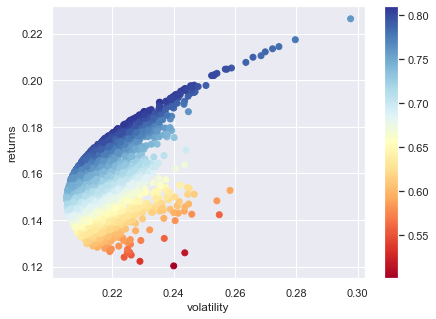

In [12]:
plt.figure(figsize = (7, 5))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()
plt.xlabel('volatility')
plt.ylabel('returns')
plt.show()